## using numpy

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
np.random.seed(0)
X = 2 * np.random.rand(100,1)
y = 0.5 * X**3 - 3 * X**2 + 2 * X + 2 + np.random.randn(100,1)

In [3]:
def polynomial_regression(X, y, degree):
    X_poly = np.c_[X]
    for d in range(2, degree + 1):
        X_poly = np.c_[X_poly, X**d]
    theta = np.linalg.inv(X_poly.T.dot(X_poly)).dot(X_poly.T).dot(y)
    return theta

In [4]:
def plot_polynomial_fit(X, y, theta, degree):
    plt.scatter(X, y, label='Data')
    X_new = np.linspace(0,2,100).reshape(-1,1)
    X_poly_new = np.c_[X_new]
    for d in range(2, degree+1):
        X_poly_new = np.c_[X_poly_new, X_new**d]
    y_new = X_poly_new.dot(theta)
    plt.plot(X_new, y_new, label=f"Degree {degree} fit", color='red')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.legend()
    plt.show()

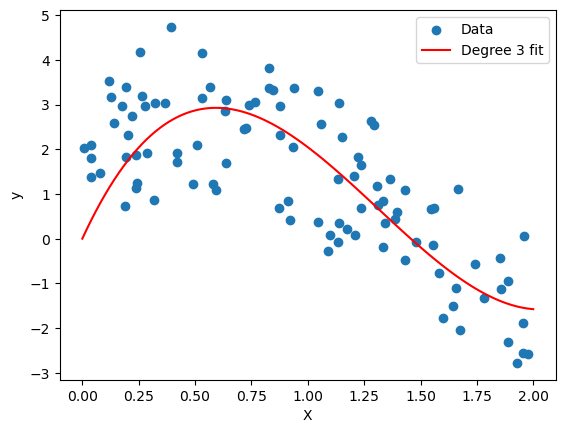

In [5]:
#Fit polynomial regression model wih degree 3
degree = 3
theta = polynomial_regression(X, y, degree)

#Visualize the plot
plot_polynomial_fit(X, y, theta, degree)

## using sklearn

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [7]:
#Transforming the features to include polynomial term upto degree 3
poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [8]:
#Fit the linear Regression model to the transformed features
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

LinearRegression()

In [9]:
X_new = np.linspace(0,2,100).reshape(-1,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

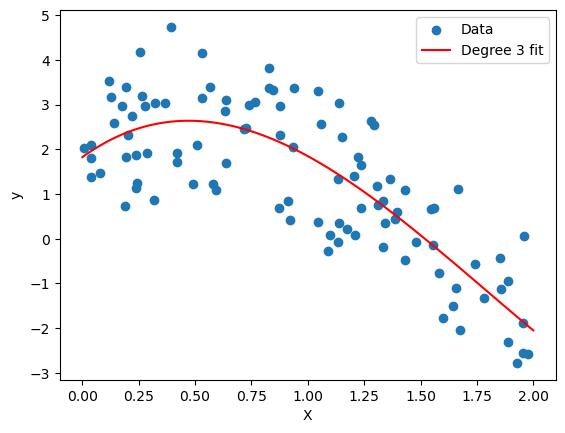

In [10]:
plt.scatter(X, y, label='Data')
plt.plot(X_new, y_new, label='Degree 3 fit', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.legend()
plt.show()